Monitoring Training Performance With XGBoost

In [4]:
# monitor training performance
import pandas as pd
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load data
dataset = pd.read_csv('course-data/diabetes.csv')
# split data into X and y
X = dataset.iloc[:, 0:8] 
Y = dataset.iloc[:, 8] 
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
# fit model on training data
model = XGBClassifier(
    booster='gbtree',  # The booster type to use, default is 'gbtree'
    objective='binary:logistic',  # Specify the learning task and the corresponding objective function
    learning_rate=0.1,  # Learning rate, default is 0.3
    max_depth=3,  # Maximum depth of a tree, default is 6
    n_estimators=100,  # Number of trees to fit, default is 100
    random_state=42,  # Random seed for reproducibility
    eval_metric='error'
)
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set, verbose=True)
# make predictions for test data
predictions = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-error:0.36220
[1]	validation_0-error:0.36220
[2]	validation_0-error:0.36220
[3]	validation_0-error:0.33071
[4]	validation_0-error:0.28346
[5]	validation_0-error:0.26378
[6]	validation_0-error:0.26772
[7]	validation_0-error:0.26772
[8]	validation_0-error:0.26772
[9]	validation_0-error:0.26772
[10]	validation_0-error:0.26378
[11]	validation_0-error:0.26772
[12]	validation_0-error:0.25984
[13]	validation_0-error:0.25984
[14]	validation_0-error:0.26378
[15]	validation_0-error:0.25591
[16]	validation_0-error:0.25197
[17]	validation_0-error:0.24016
[18]	validation_0-error:0.24409
[19]	validation_0-error:0.24016
[20]	validation_0-error:0.23622
[21]	validation_0-error:0.23622
[22]	validation_0-error:0.23228
[23]	validation_0-error:0.23622
[24]	validation_0-error:0.23622
[25]	validation_0-error:0.22441
[26]	validation_0-error:0.22441
[27]	validation_0-error:0.23228
[28]	validation_0-error:0.22835
[29]	validation_0-error:0.23228
[30]	validation_0-error:0.24016
[31]	validation_0-

Evaluate XGBoost Models With Learning Curves

Accuracy: 77.17%


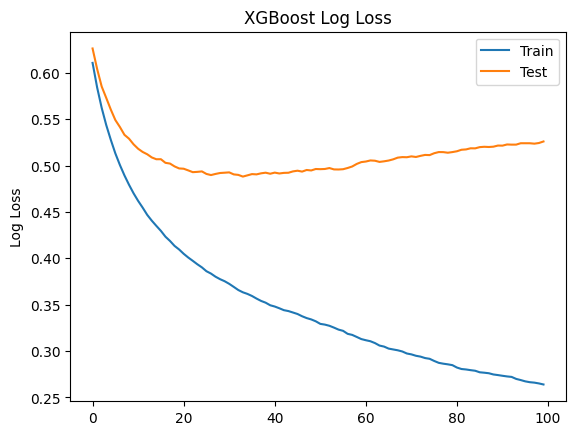

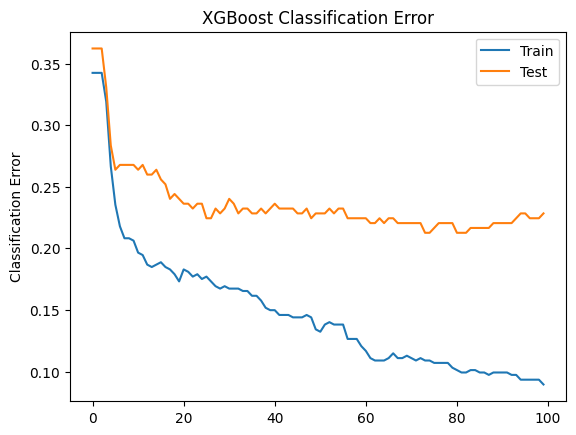

In [8]:
# plot learning curve
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

# Load data
dataset = pd.read_csv('course-data/diabetes.csv')

# Split data into X and y
X = dataset.iloc[:, 0:8]
Y = dataset.iloc[:, 8]

# Split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Fit model on training data
model = XGBClassifier(
    booster='gbtree',
    objective='binary:logistic',
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    random_state=42,
    eval_metric=['error', 'logloss']
)

# Specify validation set to monitor performance
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

# Make predictions for test data
predictions = model.predict(X_test)

# Evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

# Plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

# Plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()


Early Stopping With XGBoost

In [12]:
# early stopping
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Load data
dataset = pd.read_csv('course-data/diabetes.csv')

# Split data into X and y
X = dataset.iloc[:, 0:8]
Y = dataset.iloc[:, 8]

# Split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Fit model on training data
model = XGBClassifier(
    booster='gbtree',
    objective='binary:logistic',
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    random_state=42,
    eval_metric=['logloss'],
    early_stopping_rounds=10
)

# Specify validation set to monitor performance
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set, verbose=True)

# Print the best score and the best iteration
print("Best score: %f" % model.best_score)
print("Best iteration: %d" % model.best_iteration)

# Make predictions for test data
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.61076	validation_1-logloss:0.62631


[1]	validation_0-logloss:0.58430	validation_1-logloss:0.60419
[2]	validation_0-logloss:0.56227	validation_1-logloss:0.58531
[3]	validation_0-logloss:0.54374	validation_1-logloss:0.57299
[4]	validation_0-logloss:0.52783	validation_1-logloss:0.56045
[5]	validation_0-logloss:0.51316	validation_1-logloss:0.54913
[6]	validation_0-logloss:0.50066	validation_1-logloss:0.54162
[7]	validation_0-logloss:0.48940	validation_1-logloss:0.53317
[8]	validation_0-logloss:0.47935	validation_1-logloss:0.52903
[9]	validation_0-logloss:0.47012	validation_1-logloss:0.52295
[10]	validation_0-logloss:0.46196	validation_1-logloss:0.51817
[11]	validation_0-logloss:0.45464	validation_1-logloss:0.51471
[12]	validation_0-logloss:0.44684	validation_1-logloss:0.51221
[13]	validation_0-logloss:0.44061	validation_1-logloss:0.50880
[14]	validation_0-logloss:0.43501	validation_1-logloss:0.50685
[15]	validation_0-logloss:0.42961	validation_1-logloss:0.50688
[16]	validation_0-logloss:0.42333	validation_1-logloss:0.50299
[